# El método de Newton

In [193]:
using DerivadasNumericas
using PyPlot

    ^(NumDerive,Real) at /home/juser/DerivadasNumericas.jl:46
is ambiguous with: 
    ^(Any,Integer) at intfuncs.jl:86.
To fix, define 
    ^(NumDerive,Integer)
before the new definition.
    close(Union(String,Integer,Figure,Symbol),) at /home/juser/.julia/v0.3/PyPlot/src/PyPlot.jl:376
is ambiguous with: 
    close(Union(String,Figure,Integer,Symbol),) at /home/juser/.julia/v0.3/PyPlot/src/PyPlot.jl:376.
To fix, define 
    close(Union(String,Integer,Symbol),)
before the new definition.


Recordemos que el *método de Newton* es un método numérico *iterativo* para encontrar raíces de funciones (continuamente) diferenciables.

Sea $f$ la función cuyas raíces queremos encontrar.
La idea es que empecemos desde una adivinanza inicial $x_0$, y que la siguiente aproximación $x_1$ esté donde la recta tangente a la curva $f(x)$ en $x_0$ corte el eje $x$. 


[1] Esboza la geometría, tanto a mano como en la computadora, y así encuentra la expresión de $x_{n+1}$ en términos de $x_n$.


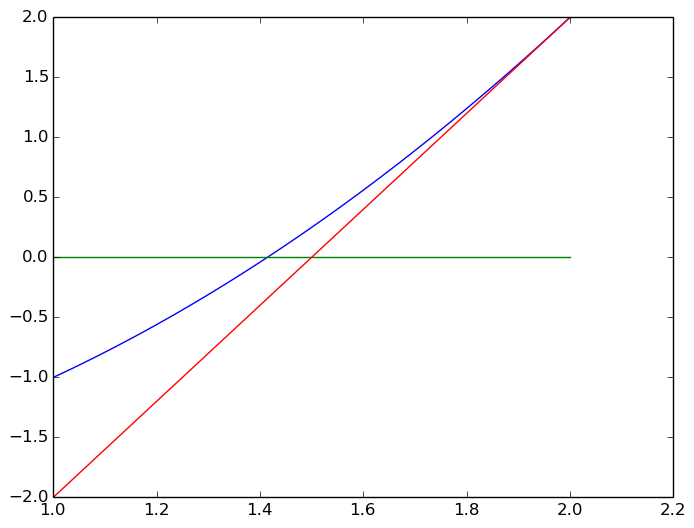

3-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fb682022750>
 PyObject <matplotlib.lines.Line2D object at 0x7fb6820229d0>
 PyObject <matplotlib.lines.Line2D object at 0x7fb68202d0d0>

In [11]:
P_2(x)=x^2-2.0
x = linspace(1, 2, 100)
y = [P_2(i) for i in x]
y_0 = zeros(100)

y_recta = [P_2(NumDerive(2,1)).f + P_2(NumDerive(2,1)).d*(i-2) for i in x]

plot(x,y,x,y_0,x,y_recta)

In [5]:
function FindRoot(F::Function, x::Number, n::Int64) #n iteraciones
  for i=1:n
    x=x-F(NumDerive(x,1)).f/F(NumDerive(x,1)).d
  end
  return (x)
end

FindRoot (generic function with 1 method)

In [30]:
function FindRoot(F::Function, x::Number, e::Float64) #e error
    i=0
    while(abs(F(x))>e)
        x=x-F(NumDerive(x,1)).f/F(NumDerive(x,1)).d
        i+=1
            if(i==30)
                break
            end
    end
    return(x)
end

FindRoot (generic function with 3 methods)

[2] Implementa la iteración para calcular la raíz cuadrada y la raíz cúbica de $2$.  ¿Cuál es una condición razonable de terminación del algoritmo?

In [61]:
f(x)=x^2-2
FindRoot(f,1,10)

1.414213562373095

In [62]:
FindRoot(f,1,1e-10)

1.4142135623746899

In [63]:
sqrt(2)==FindRoot(f,1,1e-10)

false

In [64]:
sqrt(2)==FindRoot(f,1,1e-15)

true

In [65]:
f(x)=x^3-2
FindRoot(f,1,10)

1.2599210498948732

In [38]:
FindRoot(f,1,1e-10)

1.2599210498948732

In [73]:
(2)^(1/3)==FindRoot(f,1,1e-10)

true

Converge más rápido la función para $2^{1/3}$ que para $\sqrt{2}$

[3] Haz un módulo para llevar a cabo diferenciación automática (usando el código del notebook correspondiente) y utilízalo para implementar el método.

In [ ]:
module DerivadasNumericas

  using Base
  import Base.exp, Base.sin, Base.cos, Base.log, Base.tan
  importall Base.Operators
  export NumDerive, +, -, *, /, sin, cos, exp, tan, log, ^

  type NumDerive
      f
      d
  end

    function +(u::NumDerive, v::NumDerive)
    NumDerive(u.f + v.f, u.d + v.d)
    end

    function -(u::NumDerive, v::NumDerive)
    NumDerive(u.f - v.f, u.d - v.d)
    end

    function +(u::NumDerive, n::Number)
    NumDerive(u.f + n, u.d)
    end

    function -(u::NumDerive, n::Number)
    NumDerive(u.f - n, u.d)
    end

    function *(u::NumDerive, v::NumDerive)
    NumDerive(u.f*v.f, u.f*v.d + u.d*v.f)
    end

    function *(n::Number, u::NumDerive)
    NumDerive(n*u.f, n*u.d)
    end

    function /(u::NumDerive, v::NumDerive)
    NumDerive(u.f/v.f, (u.d*v.f - v.d*u.f)/(v.f^2))
    end

    function /(n::Number, u::NumDerive)
    NumDerive(n/u.f, -(n*u.d)/(u.f^2))
    end

    function ^(u::NumDerive, n::Real)
    NumDerive(u.f^n, n*u.f^(n-1))
    end

    function Base.sin(u::NumDerive)
    NumDerive(sin(u.f), cos(u.f)*u.d)
    end

    function Base.cos(u::NumDerive)
    NumDerive(cos(u.f), -sin(u.f)*u.d)
    end

    function Base.exp(u::NumDerive)
    NumDerive(exp(u.f), exp(u.f)*u.d)
    end

    function Base.log(u::NumDerive)
    NumDerive(log(u.f), u.d/u.f)
    end

end #endmodule


El método de Newton **puede fallar**:

[4] Utiliza el mismo método para la función *compleja* $f(z) = z^3 - 1$. Empezando desde distintos números complejos $a + bi$, itera el algoritmo para ver a cuál raíz converge, y colorea el punto inicial de manera correspondiente. [Para esto, se recomienda construir una matriz y utilizar la función `pcolor` de `PyPlot`.]

Interpreta el resultado.

In [39]:
f(z)=z^3-1

f (generic function with 1 method)

In [46]:
FindRoot(f, 1+1*im,1e-15)

1.0 + 4.930380657631324e-31im

In [42]:
FindRoot(f, 1-1*im,1e-15)

1.0 - 4.930380657631324e-31im

In [43]:
FindRoot(f, -1+1*im,1e-15)

-0.5 + 0.8660254037844386im

In [44]:
FindRoot(f, -1-1*im,1e-15)

-0.5 - 0.8660254037844386im

Diferentes $x_0$ convergen a diferentes raices

In [47]:
function h(m,y1,y2) #function que logra poner los rangos de la matriz M[m,n] al rango de x_0 que quiero evaluar x_0=h(n)+h(m)*im
  return(((y2-y1)/999)*(m-1)-y2)
end

h (generic function with 1 method)

In [48]:
h(1,-20,20)

-20.0

In [49]:
h(1000,-20,20)

20.0

In [74]:
M=zeros(Complex64,1000,1000)

#Relleno M[n,m] con las raices a la que convergen los x_0
for m=1:1000
  for n=1:1000
    M[n,m]=FindRoot(f,h(n,-2,2)+h(m,-2,2)*im,1e-15)
  end
end

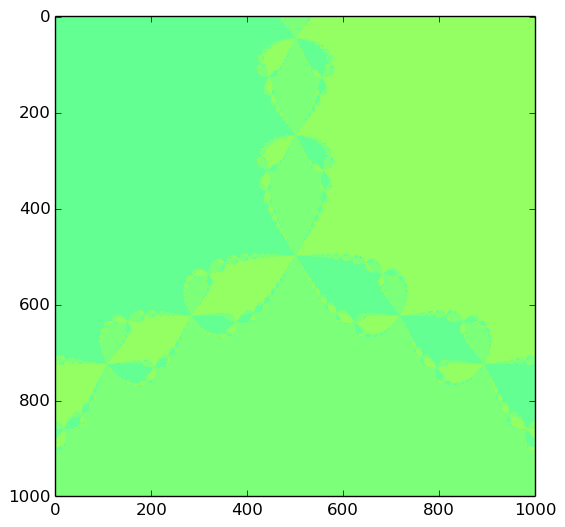

PyObject <matplotlib.image.AxesImage object at 0x7fb6810a2e10>

In [75]:
imshow(imag(M))

## Dimensión superior

[5] Desarrolla e implementa el método de Newton para funciones $\mathbf{f}: \mathbb{R}^n \to \mathbb{R}^n$. Para hacerlo, toma una adivinaza $\mathbf{x}_n$ y resuelve la ecuación $\mathbf{f}(\mathbf{x}_{n+1}) = \mathbf{0}$, con $\mathbf{x}_{n+1} = \mathbf{x}_n + \delta \mathbf{x}_n$.

In [194]:
function Variable(x) 
    NumDerive(x,1)
end

Variable (generic function with 1 method)

In [244]:
function +(n::Number, x::NumDerive) #Para que en la suma no importe el orden
    return +(x::NumDerive, n::Number)
end
function *(x::NumDerive, n::Number)
    return *(n::Number, x::NumDerive)
end

* (generic function with 292 methods)

In [292]:
f(x,y,z)=y^2

f (generic function with 2 methods)

In [293]:
typeof(f(Variable(2),1,3))

Int64

In [298]:
function Dx_R3(f::Function, x,y,z) #Defino las derivadas parciales en 3 variables
    if f(Variable(x),y,z)==Number
        return 0
    else
        return f(Variable(x),y,z).d
    end
end


function Dy_R3(f::Function, x,y,z)
        if f(x,Variable(y),z)==Number
        return 0
    else
        return f(x,Variable(y),z).d
    end
end


function Dz_R3(f::Function, x,y,z)
            if f(x,y,Variable(z))==Number
        return 0
    else
                return f(x,y,Variable(z)).d
    end
end

function D_R3(f::Function, var::Char, x,y,z)
    if var=='x'
        Dx_R3(f,x,y,z)
        elseif var=='y'
        Dy_R3(f,x,y,z)
        else var=='z'
        Dz_R3(f,x,y,z)
    end
end




D_R3 (generic function with 3 methods)

In [300]:
Dz_R3(f1,1,2,3)

LoadError: type Int64 has no field d
while loading In[300], in expression starting on line 1

In [301]:
f1(x,y,z)=x^2+y
f2(x,y,z)=y^2+z
f3(x,y,z)=z^2+1

H=[f1, f2, f3]

3-element Array{Function,1}:
 f1
 f2
 f3

In [302]:
function Jacobian(f::Array,v::Vector)
    J=zeros(Float64,3,3)
    
    J[1]=D_R3(f[1],'x',v[1],v[2],v[3])
    J[2]=D_R3(f[2],'x',v[1],v[2],v[3])
    J[3]=D_R3(f[3],'x',v[1],v[2],v[3])
    
    J[4]=D_R3(f[1],'y',v[1],v[2],v[3])
    J[5]=D_R3(f[2],'y',v[1],v[2],v[3])
    J[6]=D_R3(f[3],'y',v[1],v[2],v[3])
    
    J[7]=D_R3(f[1],'z',v[1],v[2],v[3])
    J[8]=D_R3(f[2],'z',v[1],v[2],v[3])
    J[9]=D_R3(f[3],'z',v[1],v[2],v[3])

    return J
end
    

Jacobian (generic function with 2 methods)

In [280]:
D_R3(H[1],'z',1,2,3)

LoadError: type Int64 has no field d
while loading In[280], in expression starting on line 1

[6] Utiliza tu algoritmo para calcular raíces de funciones conocidas multidimensionales.